# Regridding and Climatology
This notebook contains a regridding of the livneh dataset to 0.5° gridding. It also contains some climatology analysis - specifically we look into the average SWE over the course of the winter, with the ultimate goal of subsetting to different watershed basin regions

In [1]:
import os
import numpy as np
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # custom layouts
import pandas as pd
import datetime as dt
import matplotlib
from glob import glob

In [2]:
# Seasonal SWE
ds = xr.open_mfdataset("/Users/julianschmitt/Downloads/NOAA/liveneh_swe/*.nc")
ds = ds.groupby('time.dayofyear').mean('time')

In [10]:
x = ds.lon[:]
y = ds.lat[:]

latbounds = [32 , 55]
lonbounds = [235 , 255]
# latitude lower and upper index
lat_lower = np.argmin(np.abs(y.data - latbounds[0]))
lat_upper = np.argmin(np.abs(y.data - latbounds[1])) 

# longitude lower and upper index
lon_lower = np.argmin(np.abs(x.data - lonbounds[0]))
lon_upper = np.argmin(np.abs(x.data - lonbounds[1]))

snow_cmap = matplotlib.cm.get_cmap('Blues_r')
snow_cmap.set_bad(color='gray')

rain_cmap = matplotlib.cm.get_cmap('Greens')
rain_cmap.set_bad(color='gray')

temp_cmap = matplotlib.cm.get_cmap('coolwarm')
temp_cmap.set_bad(color='gray')

/Users/julianschmitt/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


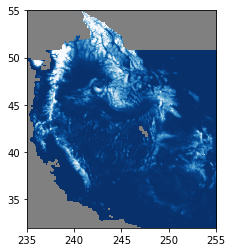

In [12]:
plt.imshow(ds.swe[0,lat_lower:lat_upper, lon_lower:lon_upper],  origin='lower', 
               cmap=snow_cmap, aspect="equal", vmin=0, vmax=500,
               extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))

In [39]:
WUS_swe_avg = np.array(ds.swe[:, lat_lower:lat_upper, lon_lower:lon_upper].mean(dim=["lat","lon"], skipna=True))

/Users/julianschmitt/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


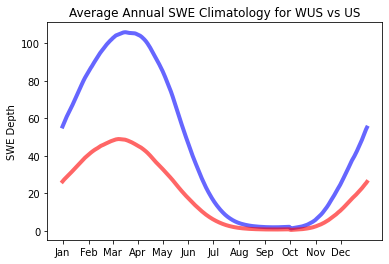

In [47]:
plt.plot(WUS_swe_avg, color="blue", alpha=0.6, linewidth = 4,label="WUS")
plt.plot(US_swe_avg, color='red', alpha=0.6, linewidth=4, label="US")
plt.ylabel("SWE Depth")
plt.xticks([0, 32, 60, 90, 120, 151, 181, 212, 243, 273, 304, 334], 
            ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Average Annual SWE Climatology for WUS vs US");
plt.savefig("../plots/climatology/swe_depth_mean.png", dpi=200)

In [33]:
US_swe_avg = swe_avg

# Resample Yearly Dataset to 0.5° Grid
Leverage Xray functions - should be straightforward

In [49]:
ds.lon

<xarray.DataArray 'lon' (lon: 922)>
array([235.40625, 235.46875, 235.53125, ..., 292.84375, 292.90625, 292.96875])
Coordinates:
  * lon      (lon) float64 235.4 235.5 235.5 235.6 ... 292.8 292.8 292.9 293.0
Attributes:
    standard_name:       longitude
    long_name:           longitude
    units:               degrees_east
    axis:                X
    coordinate_defines:  center
    actual_range:        [235.40625 292.96875]

In [58]:
# define new grid based on 0.5 degree lat-lon coordinates
lat_new = np.arange(25, 53, 0.5)
lon_new = np.arange(235.5, 293, 0.5)
ds_low = ds.reindex(lat = lat_new, lon = lon_new, method='nearest').load()

/Users/julianschmitt/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


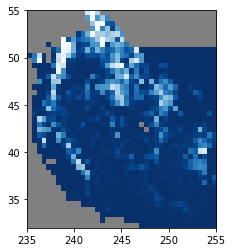

In [62]:
# lower grid indexing
x = ds_low.lon[:]
y = ds_low.lat[:]

latbounds = [32 , 55]
lonbounds = [235 , 255]
# latitude lower and upper index
lat_lower = np.argmin(np.abs(y.data - latbounds[0]))
lat_upper = np.argmin(np.abs(y.data - latbounds[1])) 

# longitude lower and upper index
lon_lower = np.argmin(np.abs(x.data - lonbounds[0]))
lon_upper = np.argmin(np.abs(x.data - lonbounds[1]))

plt.imshow(ds_low.swe[0,lat_lower:lat_upper, lon_lower:lon_upper],  origin='lower', 
               cmap=snow_cmap, aspect="equal", vmin=0, vmax=500,
               extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))

In [89]:
# get std by day
#ds.reindex(lat=lat_new, lon=lon_new, method='nearest').mean(dim=['lat', 'lon'], skipna=True).to_netcdf("/Users/julianschmitt/Downloads/NOAA/climatology/reindexed_jday_std.nc")
ds_reindex_mean = xr.load_dataset('/Users/julianschmitt/Downloads/NOAA/climatology/reindexed_jday_std.nc')
ds_std = ds_reindex_mean.groupby('time.dayofyear').std('time')
stds = ds_std.to_array()
ds_std_WUS = xr.load_dataset('/Users/julianschmitt/Downloads/NOAA/climatology/reindexed_jday_std_WUS.nc').groupby('time.dayofyear').std('time')
stds_WUS = ds_std.to_array()

In [93]:
# switch arrays to start on OCT 1: JDAY = 275
from collections import deque 


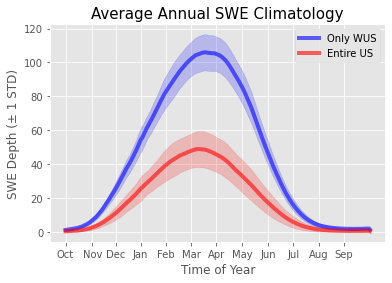

In [100]:
# plot SWE lines
plt.plot(np.roll(WUS_swe_avg, -274), color="blue", alpha=0.6, linewidth = 4,label="Only WUS")
plt.plot(np.roll(US_swe_avg, -274), color='red', alpha=0.6, linewidth=4, label="Entire US")
# label xticks
plt.xticks([0, 32, 60, 90, 120, 151, 181, 212, 243, 273, 304, 334], 
            ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep'])

# add SD bars
plt.fill_between(np.arange(0,366), np.roll(np.array(US_swe_avg-stds)[0], -274), 
                 np.roll(np.array(US_swe_avg+stds)[0],-274), color='red', alpha=0.2)
plt.fill_between(np.arange(0,366), np.roll(np.array(WUS_swe_avg-stds_WUS)[0], -274), 
                 np.roll(np.array(WUS_swe_avg+stds_WUS)[0], -274), color='blue', alpha=0.2)

# labels and styling
plt.title("Average Annual SWE Climatology", fontsize=15);
plt.ylabel("SWE Depth (± 1 STD)")
plt.xlabel("Time of Year")
plt.style.use('ggplot')
plt.legend()

plt.savefig("../plots/climatology/swe_depth_mean2.png", dpi=200) # save fig


In [96]:
np.roll(np.arange(366), -274)

array([274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  8